<a href="https://colab.research.google.com/github/jlazo3010/Entrega_trabajo_final/blob/main/splines_cubicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
from math import sqrt
import pandas as pd

In [ ]:
#Exportamos datos 
indicador_empleo = pd.read_csv('/content/drive/MyDrive/Analisis_numerico/Empleo_porcentaje.csv')
indicador_inflacion = pd.read_csv('/content/drive/MyDrive/Analisis_numerico/Inflacion_porcentaje.csv')
indicador_produccion = pd.read_csv('/content/drive/MyDrive/Analisis_numerico/ProduccionConstruccion.csv')

In [ ]:
#Limpieza de Na´s
indicador_empleo = indicador_empleo.dropna(axis=0, how='any')
indicador_inflacion = indicador_inflacion.dropna(axis=0, how='any')
indicador_produccion = indicador_produccion.dropna(axis=0, how='any')

In [ ]:
def cubic_interp1d(x0, x, y):
    x = np.asfarray(x) #Devuelve una matriz convertida en un tipo flotante.
    y = np.asfarray(y) #Devuelve una matriz convertida en un tipo flotante.
    size = len(x)

    xdiff = np.diff(x) #Calcule la diferencia discreta a lo largo del eje dado
    ydiff = np.diff(y) #Calcule la diferencia discreta a lo largo del eje dado

    #Generamos matrices sin intradas
    Li = np.empty(size)
    Li_1 = np.empty(size-1)
    z = np.empty(size) 

    # Llenamos diagonales
    Li[0] = sqrt(2*xdiff[0])
    Li_1[0] = 0.0
    B0 = 0.0 
    z[0] = B0 / Li[0]

    for i in range(1, size-1, 1):
        Li_1[i] = xdiff[i-1] / Li[i-1]
        Li[i] = sqrt(2*(xdiff[i-1]+xdiff[i]) - Li_1[i-1] * Li_1[i-1])
        Bi = 6*(ydiff[i]/xdiff[i] - ydiff[i-1]/xdiff[i-1])
        z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

    i = size - 1
    Li_1[i-1] = xdiff[-1] / Li[i-1]
    Li[i] = sqrt(2*xdiff[-1] - Li_1[i-1] * Li_1[i-1])
    Bi = 0.0 # natural boundary
    z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

    # resolvemos [L.T][x] = [y]
    i = size-1
    z[i] = z[i] / Li[i]
    for i in range(size-2, -1, -1):
        z[i] = (z[i] - Li_1[i-1]*z[i+1])/Li[i]

    # buscamos el indice
    index = x.searchsorted(x0)
    np.clip(index, 1, size-1, index)

    xi1, xi0 = x[index], x[index-1]
    yi1, yi0 = y[index], y[index-1]
    zi1, zi0 = z[index], z[index-1]
    hi1 = xi1 - xi0

    # calculamos el cubo
    f0 = zi0/(6*hi1)*(xi1-x0)**3 + \
         zi1/(6*hi1)*(x0-xi0)**3 + \
         (yi1/hi1 - zi1*hi1/6)*(x0-xi0) + \
         (yi0/hi1 - zi0*hi1/6)*(xi1-x0)
    return f0

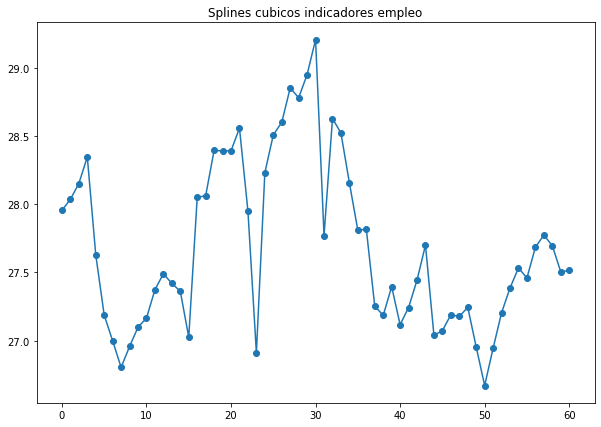

In [ ]:
    x = np.arange(0,len(indicador_empleo.iloc[:,1]))
    y = indicador_empleo.iloc[:,1]
    plt.figure(figsize=(10,7))
    plt.scatter(x, y)
    plt.title('Splines cubicos indicadores empleo')
    x_new = np.arange(0,len(indicador_empleo.iloc[:,1]))
    plt.plot(x_new, cubic_interp1d(x_new, x, y))

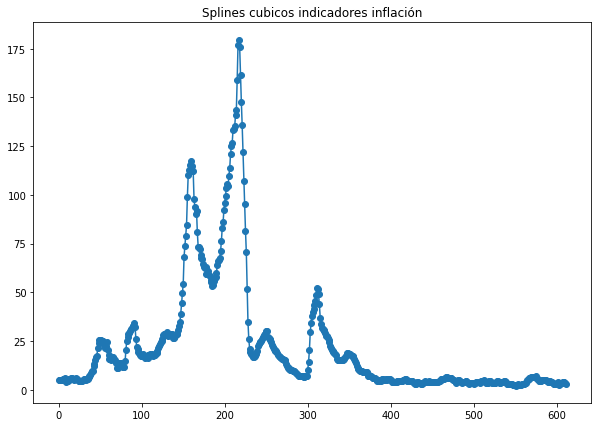

In [ ]:
    x = np.arange(0,len(indicador_inflacion.iloc[:,1]))
    y = indicador_inflacion.iloc[:,1]
    plt.figure(figsize=(10,7))
    plt.scatter(x, y)
    plt.title('Splines cubicos indicadores inflación')
    x_new = np.arange(0,len(indicador_inflacion.iloc[:,1]))
    plt.plot(x_new, cubic_interp1d(x_new, x, y))

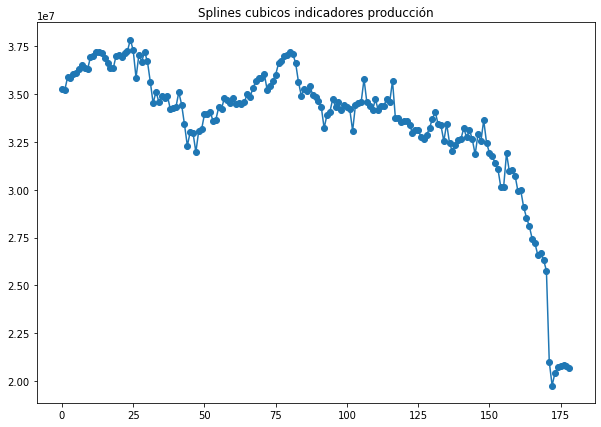

In [ ]:
    x = np.arange(0,len(indicador_produccion.iloc[:,1]))
    y = indicador_produccion.iloc[:,1]
    plt.figure(figsize=(10,7))
    plt.scatter(x, y)
    plt.title('Splines cubicos indicadores producción')
    x_new = np.arange(0,len(indicador_produccion.iloc[:,1]))
    plt.plot(x_new, cubic_interp1d(x_new, x, y))  